# Simulating microscope

In [5]:
%load_ext autoreload
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
%matplotlib
import mayavi.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from fpmsample.simicro import SimMicroscope
from fpmsample import math
from phaseopt import data
from phaseopt import math as phasemath

#mlab.init_notebook()
cfg = data.cfg_load()
sm = SimMicroscope(cfg=cfg)
sm.details()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


AttributeError: 'NoneType' object has no attribute 'lower'

In [ ]:
def set_setup(height, na):
    """ Sets up the scene.
    """
    tan_theta = na/(np.sqrt(1-na**2)) # sin/cos
    na_radius = tan_theta*height
    x0, y0 ,z0 = [0, 0, 0]
    xs, ys, zs = [0, 0, -height]
    mlab.figure(size=(600,600), bgcolor=(1, 1, 1))
    mlab.points3d(x0, y0, z0, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
    #mlab.points3d(x0, y0, z0, 1, colormap="hot", mode='axes', scale_factor=15, vmin=1, vmax=3)
    #mlab.points3d(xs, ys, zs, 2.1, colormap="hot", mode='axes', scale_factor=8, vmin=1, vmax=3)
    # Na circle projected in source plane
    #t = np.linspace(0, 2*np.pi, 100)
    #mlab.plot3d(na_radius*np.sin(t), na_radius*np.cos(t), -cfg.sample_height*np.ones_like(t), tube_radius=.5)
    mlab.points3d(xs, ys, zs, 1, colormap="hot", mode='2dsquare', scale_factor=40, vmin=1, vmax=3)
    camview = mlab.view()
    fig = mlab.gcf()
    return fig, camview

def plot_source(position, direction, camview, color='None', fig='None'):
    x, y ,z = position
    u, v, w = direction
    value = 1.2
    mlab.points3d(x, y, -z, value, color=(.1, .1, 1), mode='sphere', scale_factor=2, vmin = 2, vmax = 3, figure=fig)
    #mlab.quiver3d(x, y, -z, u, v , w, line_width=2.2, color=(.1, .1, 1), scale_factor=5, figure=fig)
    #mlab.imshow(np.zeros((30, 30)), extent=[-20, 20, -20, 20, 0, 0], figure=fig)
    mlab.view(*camview)
    return

def plot_sample_plane(position, direction):
    xspot, yspot, zspot = ct.calculate_spot_center(position, direction)
    mlab.points3d(xspot, yspot, zspot, 2, color=color, mode='2dcircle', scale_factor=.5, vmin=0, vmax=1, figure=fig)
    spot_image = ct.spot_image(position, direction)
    mlab.imshow(spot_image, extent=[-20, 20, -20, 20, 0, 0], figure=fig)
    return

def plot_matrix_plane(camview, height):
    size = 20
    x, y = np.mgrid[-size:size:1, -size:size:1]
    mlab.surf(x, y, x+0.05*y-height, representation='wireframe')
    mlab.view(*camview)
    return

# Simulation parameters
fig, camview = set_setup(sm.height, sm.na)
light_dir = [0, 0, 1]
source_center = [0, 0]
source_tilt = [0, 0]
platform_tilt = [0, 10]

plot_matrix_plane(camview, sm.height)
#for p in sm.iterator():
#    theta, phi = sm.matrix_to_angles(p.matrix)
#    y, x = np.array([p.yp-15, p.xp-15])*sm.led_gap
#    if theta is None:
#        break
#    plot_source([y, x, sm.height], [0,0,1], camview, fig=fig)
    
# arr = mlab.screenshot()
# mlab.close()
# fig, ax = plt.subplots(1,1, figsize=[10, 10])
# ax.imshow(arr)
# ax.axis('off')
# plt.show()
mlab.show()


In [ ]:
mlab.close()

In [ ]:
import numpy
from mayavi.mlab import *

def test_plot3d():
    """Generates a pretty set of lines."""
    n_mer, n_long = 6, 11
    dphi = np.pi / 1000.0
    phi = np.arange(0.0, 2 * np.pi + 0.5 * dphi, dphi)
    mu = phi * n_mer
    x = np.cos(mu) * (1 + np.cos(n_long * mu / n_mer) * 0.5)
    y = np.sin(mu) * (1 + np.cos(n_long * mu / n_mer) * 0.5)
    z = np.sin(n_long * mu / n_mer) * 0.5

    l = plot3d(x, y, z, np.sin(mu), tube_radius=0.025, colormap='Spectral')
    return l
test_plot3d()
mlab.show()

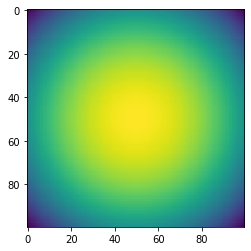

In [10]:
    kmax = np.pi/sm.ps
    step = kmax/((sm.patch-1)/2)
    kxm, kym = np.meshgrid(np.arange(-kmax,kmax+1,step), np.arange(-kmax,kmax+1, step))
    z = 1E-6
    k0 = 2*np.pi/sm.wlen
    kzm = np.sqrt(k0**2-kxm**2-kym**2)
    pupil = np.exp(1j*z*kzm)*np.exp(-z*kzm)
    plt.imshow(np.angle(pupil))
    plt.show()

## Led distance and pupil overlap

NameError: name 'np' is not defined